We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [2]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [4]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [5]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

### Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [118]:
df = pd.DataFrame([ 
    {"First Name": "Jack", "Last Name":"Massry"},
    {"First Name": "Elon", "Last Name":"Musk"},
    {"First Name": "Donald", "Last Name":"Trump"}
])


In [119]:
df

,First Name,Last Name
0,Jack,Massry
1,Elon,Musk
2,Donald,Trump


### Reading Data Files

Let's take a look at the restaurant inspections file (at `data/restaurants.csv`), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [8]:
#!mkdir data

In [9]:
#!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv

In [10]:
#!rm data/restaurant.csv.gz

In [11]:
!gzip data/restaurant.csv

gzip: data/restaurant.csv: No such file or directory


In [12]:
!gzip -cd data/restaurant.csv.gz | head -3

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
50046395,CIRO'S PIZZA,QUEENS,171,BEACH 116TH ST,11694,7186346800,Pizza,03/06/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,Critical,12,A,03/06/2017,12/04/2017,Cycle Inspection / Re-inspection
41696041,POTBELLY SANDWICH WORKS,MANHATTAN,19,WEST   45 STREET,10036,9175951141,Sandwiches/Salads/Mixed Buffet,02/06/2015,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",Critical,10,A,02/06/2015,12/04/2017,Cycle Inspection / Initial Inspection

gzip: stdout: Broken pipe


### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [69]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", encoding="utf-8", dtype="unicode")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [70]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50046395,CIRO'S PIZZA,QUEENS,171,BEACH 116TH ST,11694,7186346800,Pizza,03/06/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,12,A,03/06/2017,12/04/2017,Cycle Inspection / Re-inspection
1,41696041,POTBELLY SANDWICH WORKS,MANHATTAN,19,WEST 45 STREET,10036,9175951141,Sandwiches/Salads/Mixed Buffet,02/06/2015,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10,A,02/06/2015,12/04/2017,Cycle Inspection / Initial Inspection
2,50059054,Chawlas2,MANHATTAN,216,3RD AVE,10003,9172929094,Other,01/23/2017,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,13,NaN,NaN,12/04/2017,Pre-permit (Operational) / Initial Inspection
3,50060065,MON HING,BROOKLYN,497,ALBANY AVE,11203,7189533739,Chinese,05/10/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12,A,05/10/2017,12/04/2017,Pre-permit (Operational) / Initial Inspection
4,50002262,SOUTHEAST BAKERY,BROOKLYN,6821,FORT HAMILTON PARKWAY,11219,7186801188,Chinese,06/01/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,12/04/2017,Administrative Miscellaneous / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [71]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,339041,338697,339041,338928,339036,339036,339026,339041,339041,338096,333809,333238,339040,320074,167677,166024,339040,338095
unique,26478,20901,6,7255,3308,233,25155,85,1430,5,99,94,3,121,6,1347,1,34
top,41289382,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,10/11/2017,12/04/2017,Cycle Inspection / Initial Inspection
freq,83,3686,135053,1929,12525,9177,187,76499,945,321879,47067,47067,186528,34019,132278,404,339040,192700


We can also check the data types for each column

In [72]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [73]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [74]:
restaurants[["SCORE"]].describe()

,SCORE
count,320074.000000
mean,18.930741
std,12.985798
min,-2.000000
25%,11.000000
50%,14.000000
75%,24.000000
max,151.000000


Now let's convert the dates columns into the appropriate data types:

In [75]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [76]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [77]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,339041,166024,339040
unique,1430,1347,1
top,1900-01-01 00:00:00,2017-10-11 00:00:00,2017-12-04 00:00:00
freq,945,404,339040
first,1900-01-01 00:00:00,2012-05-01 00:00:00,2017-12-04 00:00:00
last,2017-12-02 00:00:00,2017-12-02 00:00:00,2017-12-04 00:00:00


In [78]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [79]:
restaurants.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,339041,338697,339041,338928,339036,339036,339026,339041,339041,338096,333809,333238,339040,320074.000000,161540,166024,339040,338095
unique,26478,20901,6,7255,3308,233,25155,85,1430,5,99,94,3,NaN,3,1347,1,34
top,41289382,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,1900-01-01 00:00:00,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,NaN,A,2017-10-11 00:00:00,2017-12-04 00:00:00,Cycle Inspection / Initial Inspection
freq,83,3686,135053,1929,12525,9177,187,76499,945,321879,47067,47067,186528,NaN,132278,404,339040,192700
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-01 00:00:00,2017-12-04 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-02 00:00:00,2017-12-04 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.930741,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.985798,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [80]:
restaurants["VIOLATION CODE"].head(5)

0    02G
1    06D
2    08A
3    10F
4    NaN
Name: VIOLATION CODE, dtype: category
Categories (99, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 22G]

In [81]:
column_list = ["GRADE DATE","VIOLATION CODE", "DBA"]
restaurants[ column_list ].head(5)

,GRADE DATE,VIOLATION CODE,DBA
0,2017-03-06,02G,CIRO'S PIZZA
1,2015-02-06,06D,POTBELLY SANDWICH WORKS
2,NaT,08A,Chawlas2
3,2017-05-10,10F,MON HING
4,NaT,NaN,SOUTHEAST BAKERY


In [82]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA"] ].head(5)

,GRADE DATE,VIOLATION CODE,DBA
0,2017-03-06,02G,CIRO'S PIZZA
1,2015-02-06,06D,POTBELLY SANDWICH WORKS
2,NaT,08A,Chawlas2
3,2017-05-10,10F,MON HING
4,NaT,NaN,SOUTHEAST BAKERY


We can also get quick statistics about the common values that appear in each column:

In [83]:
restaurants["DBA"].value_counts()

DUNKIN' DONUTS                           3686
SUBWAY                                   3145
MCDONALD'S                               2312
STARBUCKS                                1861
DUNKIN' DONUTS, BASKIN ROBBINS           1273
DOMINO'S                                 1221
KENNEDY FRIED CHICKEN                    1013
CROWN FRIED CHICKEN                       938
BURGER KING                               931
CHIPOTLE MEXICAN GRILL                    803
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     777
POPEYES LOUISIANA KITCHEN                 775
PAPA JOHN'S                               581
WENDY'S                                   447
KFC                                       439
LE PAIN QUOTIDIEN                         383
AU BON PAIN                               376
CARVEL ICE CREAM                          371
CHECKERS                                  363
PRET A MANGER                             345
LITTLE CAESARS                            311
HALE & HEARTY SOUP                

In [84]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            76499
Chinese                                                             35903
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    15941
Pizza                                                               15720
Italian                                                             15069
CafÃ©/Coffee/Tea                                                    13847
Mexican                                                             13062
Japanese                                                            12138
Caribbean                                                           10990
Bakery                                                              10163
Spanish                                                             10068
Pizza/Italian                                                        7356
Indian                                                               5350
Chicken                               

In [85]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    47067
08A    34703
04L    23629
02G    22732
06C    22272
06D    22199
10B    19279
04N    17733
02B    16662
04M     7646
Name: VIOLATION CODE, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

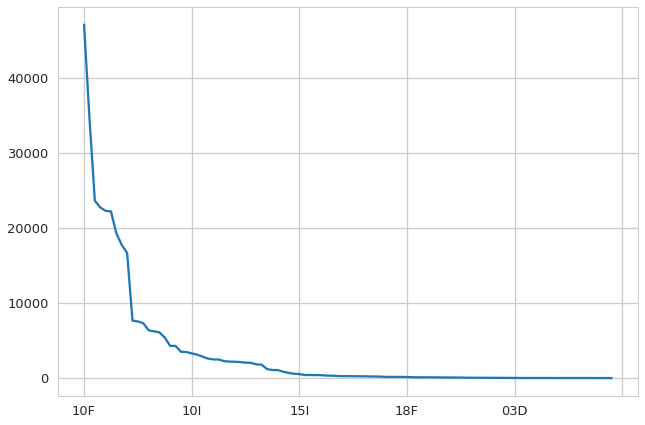

In [86]:
violation_counts.plot(kind='line')

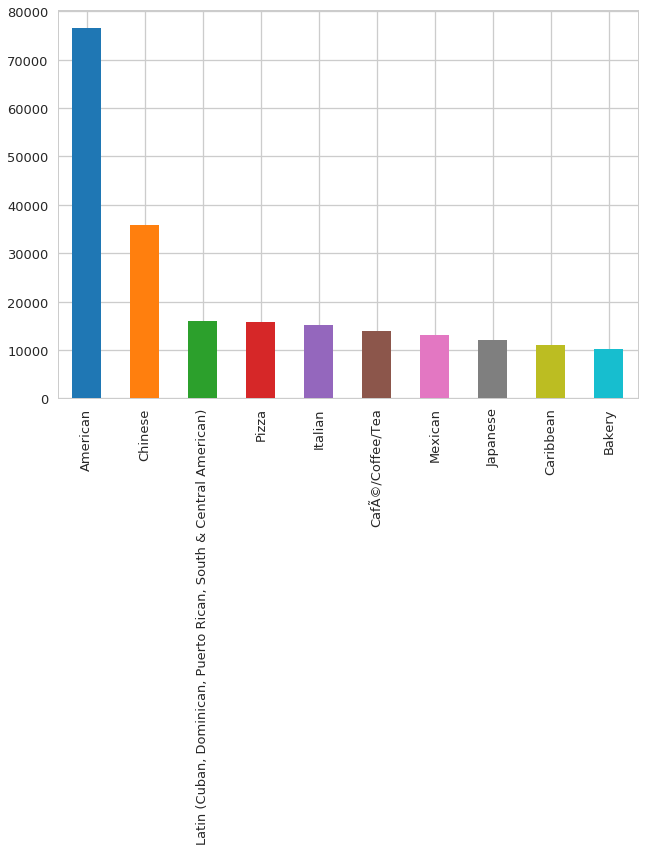

In [87]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:10].plot(kind='bar')

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [88]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24         True
25        False
26        False
27        False
28        False
29        False
          ...  
339011    False
339012    False
339013    False
339014    False
339015    False
339016    False
339017    False
339018    False
339019    False
339020    False
339021    False
339022    False
339023     True
339024    False
339025    False
339026    False
339027    False
339028    False
339029    False
339030    False
339031    False
339032    False
339033    False
339034    False
339035    False
339036    False
339037    False
339038    False
339039    False
339040    False
Name: VIOLATION CODE, Le

In [89]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
24,50004488,KING'S WOK CHINESE RESTAURANT,QUEENS,19906,LINDEN BLVD,11412,7182763838,Chinese,2017-09-21,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
37,50005630,NAYA EXPRESS,MANHATTAN,54,W 56TH ST,10019,2129447777,Middle Eastern,2017-02-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2017-02-13,2017-12-04,Cycle Inspection / Initial Inspection
68,41493340,TOKYO HOUSE JAPANESE RESTAURANT,BRONX,5648,RIVERDALE AVENUE,10471,7186016877,Japanese,2016-12-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
69,50001842,AMAZE,MANHATTAN,401,EAST 58 STREET,10022,2126888808,Asian,2017-01-10,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,31.0,C,2017-01-10,2017-12-04,Cycle Inspection / Re-inspection
79,41533453,BROOKLYN STOOPS,BROOKLYN,748,MYRTLE AVENUE,11205,3473782505,American,2015-04-16,Establishment re-closed by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,16.0,NaN,NaT,2017-12-04,Cycle Inspection / Reopening Inspection
111,50000976,MADE IN MEXICO,MANHATTAN,3950,10TH AVE,10034,6467264849,Mexican,2016-10-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
116,50016152,OPEN KITCHEN,MANHATTAN,33,E 33RD ST,10016,2128415555,American,2017-03-15,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,32.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
130,41640282,GYU-KAKU,MANHATTAN,321,WEST 44 STREET,10036,6466929115,Japanese,2017-05-31,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
136,50004933,MEE NOODLE SHOP,MANHATTAN,223,1ST AVE,10003,2122607838,Chinese,2017-06-27,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,23.0,B,2017-06-27,2017-12-04,Cycle Inspection / Re-inspection
168,41704239,GOLDEN DRAGON RESTAURANT,BROOKLYN,4413,NEW UTRECHT AVE,11219,7188714753,Chinese,2014-09-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,37.0,C,2014-09-09,2017-12-04,Cycle Inspection / Re-inspection


In [90]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   207
DUNKIN' DONUTS                           145
CROWN FRIED CHICKEN                      100
DOMINO'S                                  93
KENNEDY FRIED CHICKEN                     92
MCDONALD'S                                76
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     73
DUNKIN' DONUTS, BASKIN ROBBINS            68
STARBUCKS                                 65
PAPA JOHN'S                               49
BURGER KING                               47
POPEYES LOUISIANA KITCHEN                 43
CARVEL ICE CREAM                          37
LITTLE CAESARS                            26
LE PAIN QUOTIDIEN                         25
AMC THEATRES                              23
KFC                                       23
BAREBURGER                                23
CHECKERS                                  23
INSOMNIA COOKIES                          21
Name: DBA, dtype: int64

In [91]:
has_mice["CAMIS"].value_counts()[:5]

41309387    13
41444879    13
40386147    12
50004065    12
41430594    12
Name: CAMIS, dtype: int64

In [92]:
condition = (restaurants["CAMIS"] == '41309387')
restaurants[condition]


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
1750,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2015-11-17,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,12.0,A,2015-11-17,2017-12-04,Cycle Inspection / Re-inspection
5584,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2015-03-05,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,16.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
6753,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2016-07-25,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,23.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
17352,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2014-05-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,17.0,B,2014-05-05,2017-12-04,Cycle Inspection / Re-inspection
24466,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2015-12-15,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Critical,33.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
47090,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2016-08-22,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,2016-08-22,2017-12-04,Cycle Inspection / Re-inspection
48644,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2014-10-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,9.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
55876,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2014-10-22,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,16.0,B,2014-10-22,2017-12-04,Cycle Inspection / Re-inspection
74660,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2014-10-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
87319,41309387,NEW TACO EXPRESS,MANHATTAN,130,EAST 28 STREET,10016,2126798866,Tex-Mex,2017-03-30,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,2017-03-30,2017-12-04,Cycle Inspection / Re-inspection


And we can use more complex conditions:

In [93]:
mice_manhattan = (restaurants["VIOLATION CODE"] == "04L") \
                    & (restaurants["BORO"] == "MANHATTAN") \
                    & (restaurants["ZIPCODE"] == "10012")

In [94]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
873,41659206,SIGGY'S NYC,MANHATTAN,292,ELIZABETH STREET,10012,2122265775,American,2017-06-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,39.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
1134,50011722,OLD TBILISI,MANHATTAN,174,BLEECKER ST,10012,2124706064,Mediterranean,2014-11-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,29.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
1247,41721722,KOPI KOPI,MANHATTAN,68,WEST 3 STREET,10012,2127777285,Indonesian,2014-01-21,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
1288,40370759,CAFE ESPANOL,MANHATTAN,172,BLEECKER STREET,10012,2125050657,Spanish,2017-01-09,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
1877,50011127,MINT MASALA,MANHATTAN,95,MACDOUGAL ST,10012,2127772888,Indian,2017-11-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
1942,41314548,THINK COFFEE,MANHATTAN,1,BLEECKER STREET,10012,2125333366,CafÃ©/Coffee/Tea,2016-10-11,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
2614,40728858,VOL DE NUIT,MANHATTAN,148,WEST 4 STREET,10012,2129823388,French,2017-03-10,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2017-03-10,2017-12-04,Cycle Inspection / Initial Inspection
2819,50012740,EGG SHOP,MANHATTAN,151,ELIZABETH ST,10012,6466660810,American,2015-07-27,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2015-07-27,2017-12-04,Cycle Inspection / Re-inspection
3051,50011127,MINT MASALA,MANHATTAN,95,MACDOUGAL ST,10012,2127772888,Indian,2016-03-21,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,NaN,NaT,2017-12-04,Cycle Inspection / Initial Inspection
3121,40914459,VILLAGE UNDERGROUND,MANHATTAN,130,WEST 3 STREET,10012,2127777745,American,2014-11-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,2014-11-12,2017-12-04,Cycle Inspection / Initial Inspection


In [95]:
has_mice_10012["DBA"].value_counts()[:20]

PORTO BELLO RESTAURANT    8
KOPI KOPI                 7
OLD TBILISI               7
TRIONA'S                  7
DOJO RESTAURANT           7
INSOMNIA COOKIES          7
MONTE'S                   6
TARTINERY                 6
UNCLE TED'S               6
V-BAR & CAFE              5
JACQUES 1534              5
EPISTROPHY CAFE           5
CAFE ESPANOL              5
OFF THE WAGON             5
EMMETTS                   4
SIGGY'S NYC               4
BY CHLOE                  4
THE KATI ROLL COMPANY     4
LUXOR LOUNGE              4
NEGRIL                    4
Name: DBA, dtype: int64

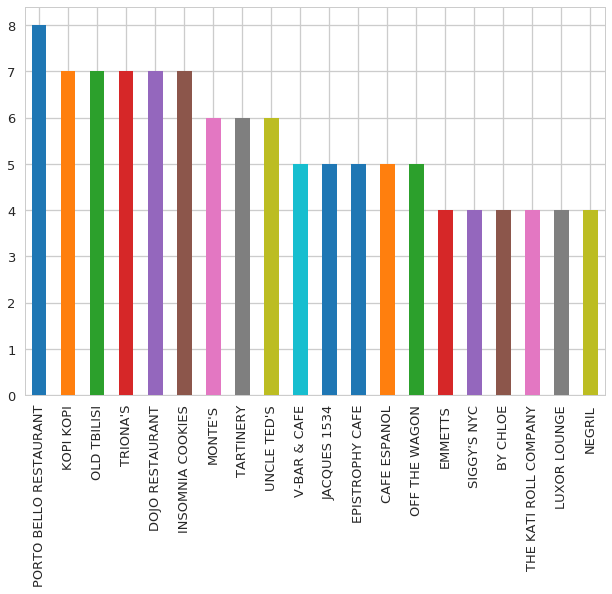

In [96]:
has_mice_10012["DBA"].value_counts()[:20].plot(kind='bar')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [97]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [98]:
pivot

,CAMIS
INSPECTION DATE,
1900-01-01,945
2011-10-07,1
2012-05-01,2
2013-02-28,1
2013-03-29,1
2013-04-19,4
2013-04-24,3
2013-04-25,4
2013-04-26,3


##### Changing date granularity 

We can also use the `[resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)` command to change the frequency from one day, to, say, 7 days.

In [99]:
pivot.resample('1D').mean()

,CAMIS
INSPECTION DATE,
1900-01-01,945.0
1900-01-02,NaN
1900-01-03,NaN
1900-01-04,NaN
1900-01-05,NaN
1900-01-06,NaN
1900-01-07,NaN
1900-01-08,NaN
1900-01-09,NaN


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [100]:
pivot.head(5)

,CAMIS
INSPECTION DATE,
1900-01-01,945
2011-10-07,1
2012-05-01,2
2013-02-28,1
2013-03-29,1


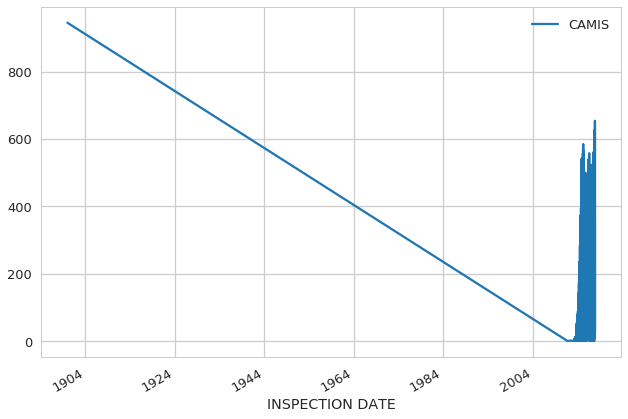

In [101]:
pivot.plot()

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis=0` parameter means that we delete a **row** with that index value. (The `axis=1` means that we delete a column.)
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [102]:
pivot.drop(pd.to_datetime('1900-01-01'), axis=0, inplace=True) 

And let's plot again.

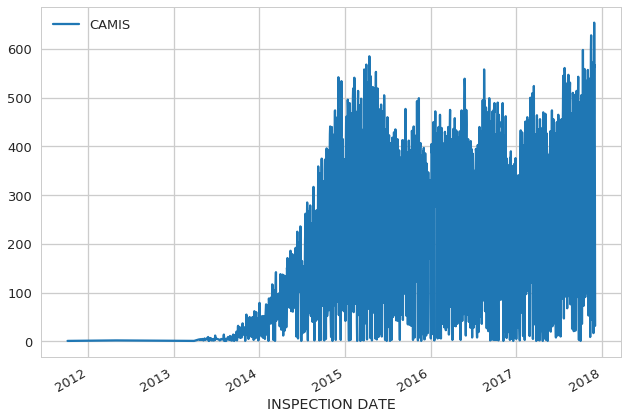

In [103]:
pivot.plot()

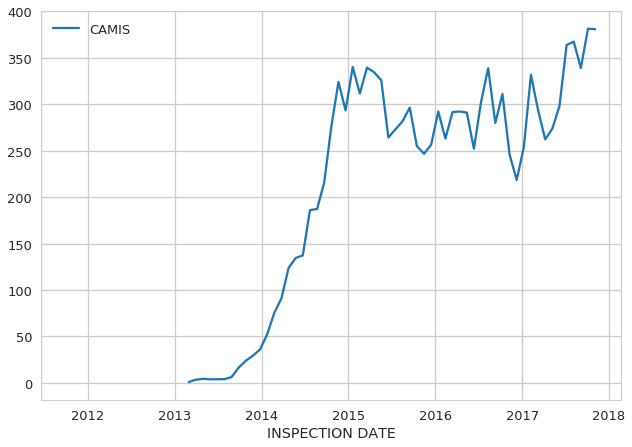

In [104]:
pivot.resample('30D').mean().plot()

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [105]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

In [106]:
pivot2.head(10)

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
INSPECTION DATE,,,,,,
1900-01-01,79.0,244.0,380.0,5.0,213.0,24.0
2011-10-07,NaN,NaN,NaN,NaN,1.0,NaN
2012-05-01,NaN,NaN,NaN,NaN,2.0,NaN
2013-02-28,NaN,1.0,NaN,NaN,NaN,NaN
2013-03-29,NaN,NaN,1.0,NaN,NaN,NaN
2013-04-19,NaN,NaN,NaN,NaN,4.0,NaN
2013-04-24,NaN,NaN,3.0,NaN,NaN,NaN
2013-04-25,NaN,NaN,4.0,NaN,NaN,NaN
2013-04-26,NaN,NaN,3.0,NaN,NaN,NaN


##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [107]:
# The "axis=0" means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis=0) 

In [108]:
# The "axis=1" means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis=1)

In [109]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean()

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
INSPECTION DATE,,,,,
2011-10-31,NaN,NaN,NaN,1.000000,NaN
2011-11-30,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN
2012-01-31,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,NaN,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN
2012-04-30,NaN,NaN,NaN,NaN,NaN
2012-05-31,NaN,NaN,NaN,2.000000,NaN
2012-06-30,NaN,NaN,NaN,NaN,NaN


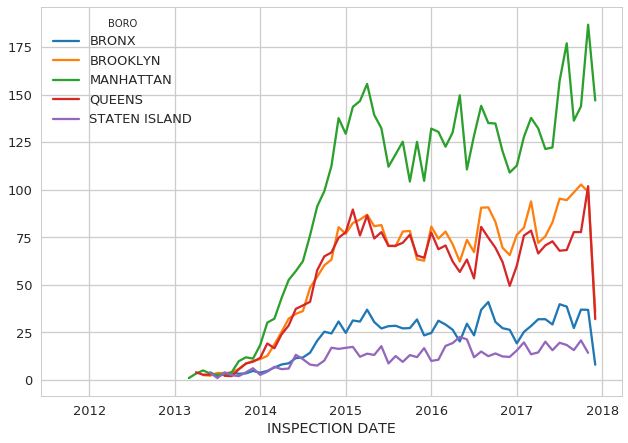

In [110]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot()

### Exercise 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [111]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'SCORE',  # specifies the content of the cells
    aggfunc = 'mean' # we ask to count how many different CAMIS values we see
)

In [112]:
pivot

,SCORE
INSPECTION DATE,
1900-01-01,NaN
2011-10-07,2.000000
2012-05-01,7.000000
2013-02-28,NaN
2013-03-29,28.000000
2013-04-19,21.000000
2013-04-24,10.000000
2013-04-25,24.000000
2013-04-26,7.666667


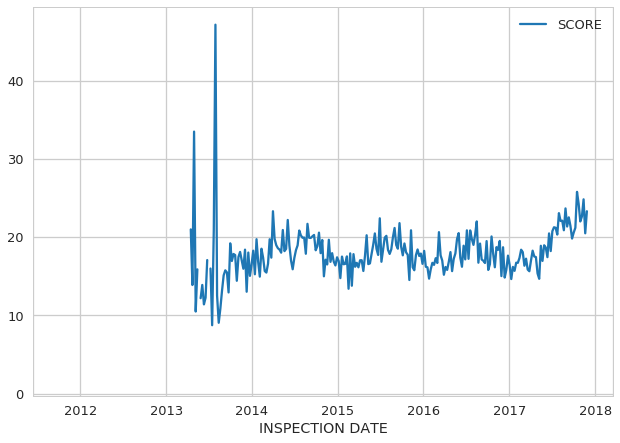

In [117]:
pivot.resample('7d').mean().plot()

### Exercise

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collissions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


* Task 1: Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 



* Task 2: Find out the most common contributing factors to the collisions. 
 

   
* Task 3: Break down the number of collisions by borough.





* Task 4: Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

   
* Task 5: Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

 * Task 6: Find the dates with the most accidents. Can you figure out what happened on these days? 



* Task 7: Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


* Task 8: Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

* Task 9: Plot the accidents in map as above, but limit the data only to accidents with at least one injury.